In [1]:
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib as mpl
import xarray as xr
import functools
import pandas as pd

import tams
#password y0crD@&l1G9E$2i

In [ ]:
# Examples from TAMS documentation

pr =  tams.data.get_imerg("2024-06-01 02:30")["pr"] # <===== I had to change the function, adding the 'engine' argm and manually putting h5netcdf. For notice, you have to create
# an account on the earthaccess system and go the URL when it fails the first time to accept the conditions for dowloading files from the data base.
pr

QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 58.65it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.47s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<?, ?it/s]


<xarray.DataArray 'pr' (lat: 1800, lon: 3600)> Size: 26MB
[6480000 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 7kB -89.95 -89.85 -89.75 -89.65 ... 89.75 89.85 89.95
  * lon      (lon) float32 14kB -179.9 -179.9 -179.8 ... 179.8 179.8 179.9
    time     datetime64[ns] 8B 2024-06-01T02:30:00
Attributes:
    units:        mm/hr
    long_name:    precipitation rate
    description:  Complete merged microwave-infrared (gauge-adjusted) precipi...

QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 11.75it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.11s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<?, ?it/s]


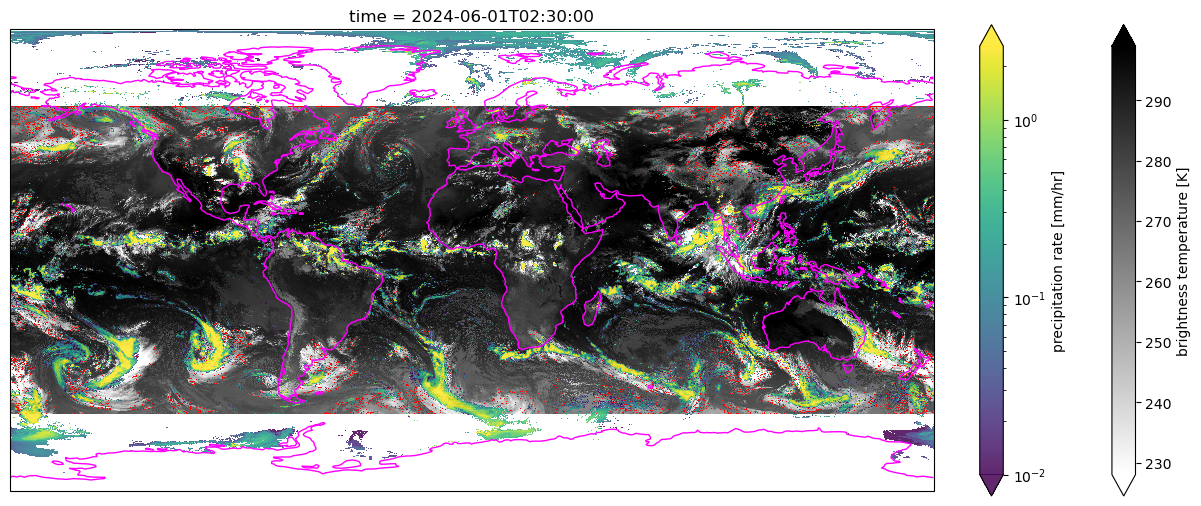

In [5]:
#time

tb = tams.data.get_mergir(pr.time.item())["tb"]
tb

fig = plt.figure(figsize=(12, 5), layout="constrained")
ax = fig.add_subplot(projection=ccrs.PlateCarree())

ax.coastlines(color="magenta")

cmap = plt.get_cmap("gist_gray_r")
cmap.set_bad("red")
tb.plot(x="lon", cmap=cmap, robust=True, ax=ax)
pr.plot(x="lon", norm=mpl.colors.LogNorm(0.01, pr.quantile(0.99)), alpha=0.85, ax=ax)